<a href="https://colab.research.google.com/github/gabaugusto/exploratory_analysis_pokemon/blob/master/Pokedex_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pokémon Data Analysis

Welcome to the exciting world of Pokémon and data analysis! For decades, Pokémon has been more than just a game or a franchise—it’s been a cultural phenomenon that bridges generations. With its rich universe of creatures, each with unique attributes, evolutions, and abilities, Pokémon offers an engaging and structured dataset that is perfect for anyone starting their journey in data science and machine learning.

Imagine delving into the stats of Pikachu, analyzing how Charizard’s attributes evolve, or predicting whether a mysterious new Pokémon belongs to the legendary class. The possibilities are as vast as the Pokédex itself! Working with Pokémon data not only makes learning fun and relatable but also equips you with foundational skills for tackling real-world datasets.

## Why Work with Pokémon Data?

The Pokémon dataset is a treasure trove for beginners because it strikes a perfect balance between complexity and accessibility. Here are a few reasons why it’s an ideal starting point:

**Diverse Features**: From heights and weights to battle stats like attack and speed, the data provides a mix of numeric, categorical, and textual attributes, offering ample opportunities to explore and apply different analytical techniques.

**Familiarity and Fun**: Who doesn’t love Pokémon? Using a dataset tied to a beloved franchise makes the learning process engaging and relatable, helping you stay motivated.

**Real-World Relevance**: Pokémon data mirrors the types of datasets you’ll encounter in professional settings, with imperfect entries, missing values, and the need for feature engineering. Tackling these challenges here prepares you for future projects.

**Broad Applications**: Whether it’s classification, clustering, or even predictive modeling, Pokémon data can serve as a sandbox for exploring various machine learning techniques.

## The Dataset We’re Using

Our dataset spans hundreds of Pokémon and their unique characteristics:

**Attributes**: Basic information such as name, type, height, weight, and generation.

**Battle Stats**: Metrics like HP (health points), attack, defense, and speed.

**Classifications**: Categories such as “ordinary,” “legendary,” and “baby” Pokémon.

**Forms and Variants**: Regional variants and special forms like Gigantamax.

**Relationships**: Evolutionary lines that show how Pokémon transform as they grow.

**IMPORTANT**: While the data is rich and varied, it’s not perfect. Some entries have missing values or inconsistencies, but that’s part of the learning experience. Together, we’ll clean, enrich, and refine this dataset, uncovering valuable insights along the way.

### Setting the Stage

As we embark on this journey, remember that working with Pokémon data isn’t just about crunching numbers—it’s about storytelling. Each analysis reveals something fascinating about these creatures and the universe they inhabit. By the end, you’ll not only have honed your technical skills but also gained a new appreciation for the power of data in uncovering hidden patterns and making informed predictions.

So, grab your Pokédex, and let’s dive into the world of Pokémon data analysis! Whether you’re a data science rookie or a seasoned enthusiast, this adventure promises to be both educational and thrilling.

**Let’s catch ‘em all—insights, that is!**


# 1 Understanding and Preprocess the Dataset

Dataset is clean and well-structured.

Handling missing values (e.g., fill, drop, or flag missing data).

Encode categorical data (e.g., types, abilities, and classifications) into numerical formats using one-hot encoding or label encoding.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/pokemon_dataset/pokemons_9gen.csv", sep = ";")

In [ ]:
df.head()

,id,name,classification,rank,generation,regional_variant,form_variant,gmax,stage,height,...,type1,type2,hp,atk,def,spatk,spdef,speed,abilities,desc
0,1,bulbasaur,Seed Pokémon,ordinary,generation-i,NaN,NaN,NaN,one,7,...,grass,poison,45,49,49,65,65,45,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,Seed Pokémon,ordinary,generation-i,NaN,NaN,NaN,two,10,...,grass,poison,60,62,63,80,80,60,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,Seed Pokémon,mega-evolution,generation-vi,NaN,NaN,NaN,final,24,...,grass,poison,80,100,123,122,120,80,thick-fat,"In order to support its flower, which has grow..."
3,3,venusaur,Seed Pokémon,ordinary,generation-i,NaN,NaN,NaN,final,20,...,grass,poison,80,82,83,100,100,80,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
4,3,venusaur,Seed Pokémon,ordinary,generation-viii,NaN,NaN,True,final,24,...,grass,poison,80,100,123,122,120,80,thick-fat,The plant blooms when it is absorbing solar en...


# 2. Improving the Dataset

Feature Engineering: Create new features (e.g., total stats, stat ratios) and dumming the types and the rank.

## 2.1 Define Your Features and Target

Features: Select relevant attributes such as stats (HP, Attack, Defense, etc.), types, abilities, height, weight, etc.

Target: The classification column (e.g., ordinary, legendary, baby).



In [ ]:
# Putting the dataset in the rightway:

# 1. Filling the blank spaces
# fill na with none
df["classification"] = df["classification"].fillna("none")
df["regional_variant"] = df["regional_variant"].fillna("none")
df["form_variant"] = df["form_variant"].fillna("none")
df["gmax"] = df["gmax"].fillna("false")
df["type2"] = df["type2"].fillna("none")

# 2. Turn the values in to lowercase
df["classification"] = df["classification"].str.lower()
df["gmax"] = df["gmax"].str.lower()

# 3. dumming some columns. Turning quality values into booleans values so they can behave like numbers.

# Use pd.get_dummies instead of Series.get_dummies
df = pd.get_dummies(df, columns=["regional_variant", "form_variant", "classification", "rank", "generation", "gmax", "stage", "type1", "type2"])

df.head()

,id,name,height,weight,evolves_from,hp,atk,def,spatk,spdef,...,type2_grass,type2_ground,type2_ice,type2_none,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,1,bulbasaur,7,69,nothing,45,49,49,65,65,...,False,False,False,False,False,True,False,False,False,False
1,2,ivysaur,10,130,bulbasaur,60,62,63,80,80,...,False,False,False,False,False,True,False,False,False,False
2,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,True,False,False,False,False
3,3,venusaur,20,1000,ivysaur,80,82,83,100,100,...,False,False,False,False,False,True,False,False,False,False
4,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Create a column named total_stats after speed column and sum the stas of "hp",	"atk", "def",  "spatk",  "spdef",  "speed"

# Calculate total stats
df['total_stats'] = df['hp'] + df['atk'] + df['def'] + df['spatk'] + df['spdef'] + df['speed']

# Reorder columns to place 'total_stats' after 'speed'
cols = list(df.columns)
cols.insert(cols.index('speed') + 1, cols.pop(cols.index('total_stats')))
df = df[cols]

df.describe()

,id,height,weight,hp,atk,def,spatk,spdef,speed,total_stats
count,1221.000000,1221.000000,1221.00000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,498.362817,13.036036,3341.29484,71.439803,81.371007,75.082719,73.117936,72.552826,69.772318,443.336609
std,300.305836,13.450590,15917.72456,26.589638,32.104707,30.466653,32.172219,27.262835,29.954456,119.111343
min,1.000000,1.000000,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,233.000000,6.000000,97.00000,53.000000,57.000000,53.000000,50.000000,51.000000,45.000000,334.000000
50%,492.000000,10.000000,320.00000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000,470.000000
75%,759.000000,16.000000,828.00000,85.000000,100.000000,92.000000,95.000000,90.000000,90.000000,525.000000
max,1025.000000,200.000000,100000.00000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000


In [ ]:
# Dealing with the abilities column

# Step 1: Split the abilities into separate words
df['abilities_split'] = df['abilities'].str.split()

# Step 2: Expand the lists into rows for easier processing
expanded_df = df.explode('abilities_split')

# Step 3: Create dummy columns using get_dummies
dummy_columns = pd.get_dummies(expanded_df['abilities_split'], prefix='abilities')

# Step 4: Aggregate dummy columns back to the original DataFrame structure
# Use the index of the concatenated DataFrame (or expanded_df.index) for grouping
result = pd.concat([df, dummy_columns], axis=1).groupby(dummy_columns.index).max()
# OR
# result = pd.concat([df, dummy_columns], axis=1).groupby(pd.concat([df, dummy_columns], axis=1).index).max()

# Drop the 'abilities_split' column (optional)
result = result.drop(columns=['abilities_split'])

df = df.drop(columns=['abilities_split'])

df = result

# removing the temporary datasets
del dummy_columns
del expanded_df
del result

df.head()

,id,name,height,weight,evolves_from,hp,atk,def,spatk,spdef,...,abilities_weak-armor,abilities_well-baked-body,abilities_white-smoke,abilities_wimp-out,abilities_wind-power,abilities_wind-rider,abilities_wonder-guard,abilities_wonder-skin,abilities_zen-mode,abilities_zero-to-hero
0,1,bulbasaur,7,69,nothing,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,ivysaur,10,130,bulbasaur,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
3,3,venusaur,20,1000,ivysaur,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
4,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# count and sum and list every column that has na or null values

# Count and sum of NA/null values per column
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]

print("Columns with NA/null values:")
print(na_columns)

print("\nSum of NA/null values per column:")
na_counts

Columns with NA/null values:
Series([], dtype: int64)

Sum of NA/null values per column:


,0
id,0
name,0
height,0
weight,0
evolves_from,0
...,...
abilities_wind-rider,0
abilities_wonder-guard,0
abilities_wonder-skin,0
abilities_zen-mode,0


In [ ]:
# prompt: List the rows with nan or null values

# Count and sum of NA/null values per column
na_counts = df.isna().sum()

# Filter columns with NA/null values
na_columns = na_counts[na_counts > 0]

# Print column names with NA/null values
print("Columns with NA/null values:")
print(na_columns)

# Print rows with NA/null values for each column
for col in na_columns.index:
  print(f"\nRows with NA/null values in column '{col}':")
  print(df[df[col].isna()])

Columns with NA/null values:
Series([], dtype: int64)


# 3. Exploratory Data Analysis (EDA)

Visualize correlations between features and the target (e.g., Does legendary Pokémon might have higher stats?).

Identify imbalanced classes (e.g., if most Pokémon are "ordinary" and very few are "legendary").

What are the percentages of ranks of every pokemon type?

Lets start describing the Data to get some insights.

In [ ]:
df.describe()

,id,height,weight,hp,atk,def,spatk,spdef,speed,total_stats
count,1221.000000,1221.000000,1221.00000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,498.362817,13.036036,3341.29484,71.439803,81.371007,75.082719,73.117936,72.552826,69.772318,443.336609
std,300.305836,13.450590,15917.72456,26.589638,32.104707,30.466653,32.172219,27.262835,29.954456,119.111343
min,1.000000,1.000000,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,233.000000,6.000000,97.00000,53.000000,57.000000,53.000000,50.000000,51.000000,45.000000,334.000000
50%,492.000000,10.000000,320.00000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000,470.000000
75%,759.000000,16.000000,828.00000,85.000000,100.000000,92.000000,95.000000,90.000000,90.000000,525.000000
max,1025.000000,200.000000,100000.00000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000


Total records (unique IDs): 1025
Number of records with type1_fire or type2_fire: 99
Percentage of records with type1_fire or type2_fire: 9.66%


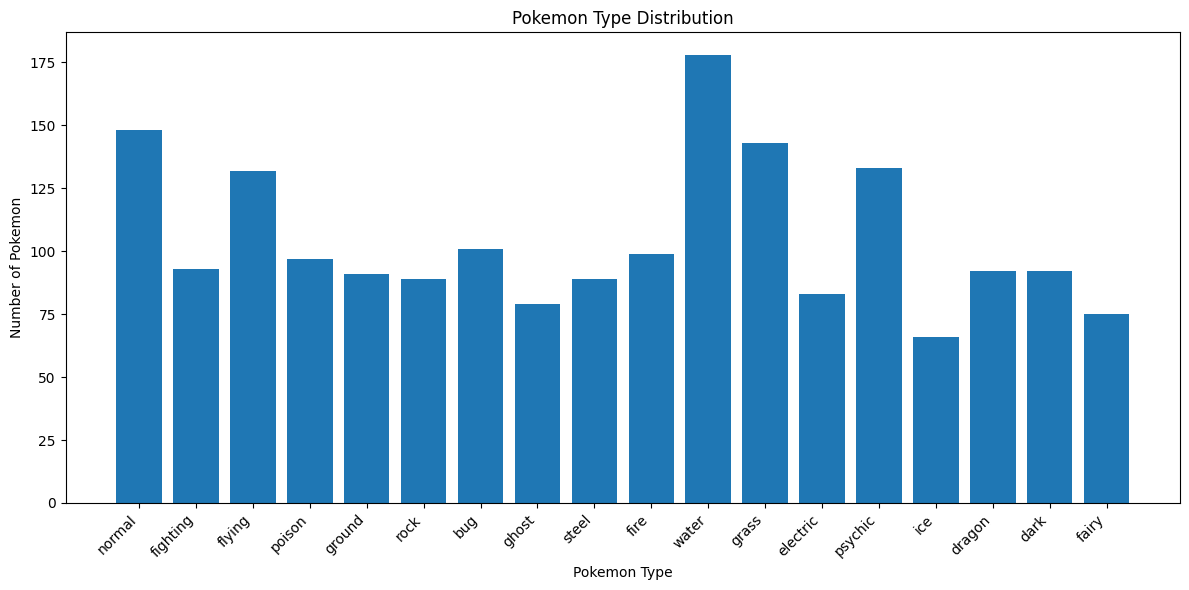

In [ ]:
import matplotlib.pyplot as plt

# Calculate total records (excluding duplicates based on 'id')
total_records = df['id'].nunique()
print(f"Total records (unique IDs): {total_records}")

# Calculate records with type1_fire or type2_fire as True
type1_fire_count = df['type1_fire'].sum()
type2_fire_count = df['type2_fire'].sum()
fire_type_records = type1_fire_count + type2_fire_count - (df['type1_fire'] & df['type2_fire']).sum()

# Calculate and print the percentage
percentage_fire_type = (fire_type_records / total_records) * 100
print(f"Number of records with type1_fire or type2_fire: {fire_type_records}")
print(f"Percentage of records with type1_fire or type2_fire: {percentage_fire_type:.2f}%")

# Creating the bar chart

# Create lists to store type names and counts for the chart
type_names = []
type_counts = []

types = ["normal", "fighting", "flying", "poison", "ground", "rock", "bug", "ghost", "steel", "fire", "water", "grass", "electric", "psychic", "ice",	"dragon", "dark", "fairy"]

# Loop through each type and calculate/store the statistics
for type_name in types:
    type1_count = df[f'type1_{type_name}'].sum()
    type2_count = df[f'type2_{type_name}'].sum()

    # Calculate records with either type1 or type2 as True (avoiding double-counting)
    type_records = type1_count + type2_count - (df[f'type1_{type_name}'] & df[f'type2_{type_name}']).sum()

    type_names.append(type_name)
    type_counts.append(type_records)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(type_names, type_counts)
plt.xlabel("Pokemon Type")
plt.ylabel("Number of Pokemon")
plt.title("Pokemon Type Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The percentages here do not help us much as there are lots of repeated idS, alternative forms and so on...

Lets do the same to ranks.

To this sample we will use the term competitive, that is when the pokemon is on final stage and also is ordinary.

There too many pokemons and the ones that are not in final stage we don't consider as competitive.

Total pokemon (unique Pokedex IDs): 1025
Number of pokemon of rank competitive: 526
Percentage of pokemons with rank competitive: 51.32%

Number of pokemon of rank legendary: 99
Percentage of pokemons with rank legendary: 9.66%

Number of pokemon of rank mega-evolution: 51
Percentage of pokemons with rank mega-evolution: 4.98%

Number of pokemon of rank paradox: 20
Percentage of pokemons with rank paradox: 1.95%

Number of pokemon of rank baby: 18
Percentage of pokemons with rank baby: 1.76%



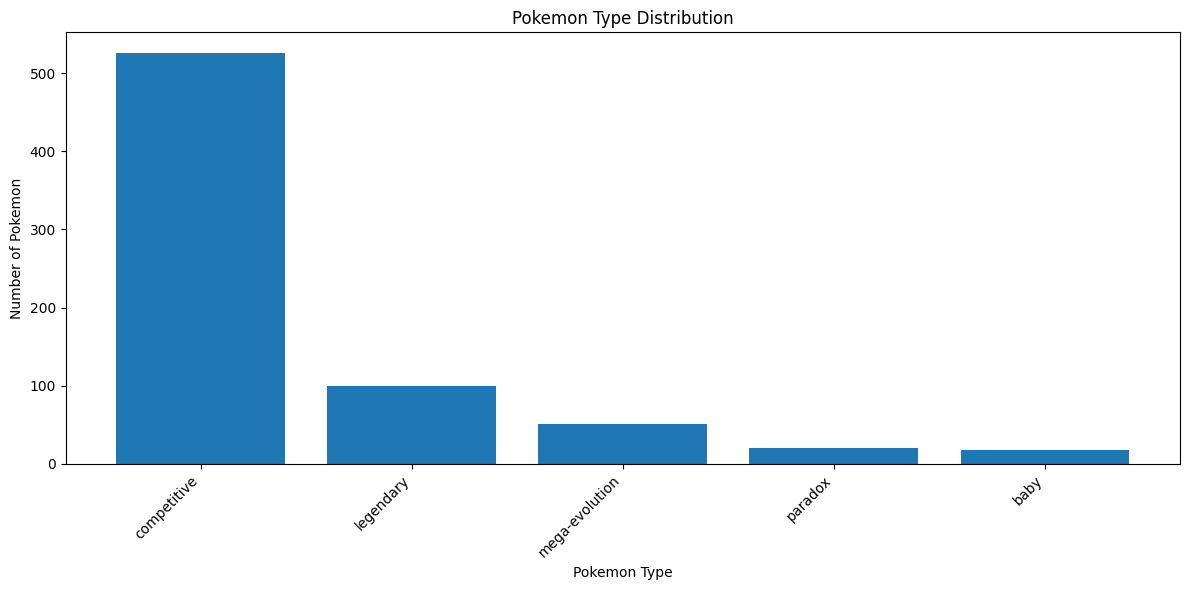

In [ ]:
# prompt: Show the total of records (excluding same id) than show the quantity and percentage of records that have type1_fire or type2_fire as true. repeat to every other type.

# Calculate total records (excluding duplicates based on 'id') (same as above)
total_records = df['id'].nunique()
print(f"Total pokemon (unique Pokedex IDs): {total_records}")

# To this sample we will use the term competitive.
df['rank_competitive'] = (df['stage_final'] == True) & (df['rank_ordinary'] == True)

# Define a list of ranks to iterate through
ranks = ['competitive', 'legendary', 'mega-evolution', 'paradox', 'baby']

# Loop through each rank and calculate/print the statistics
for rank_name in ranks:
    rank_count = df[f'rank_{rank_name}'].sum()

    percentage_rank = (rank_count / total_records) * 100

    print(f"Number of pokemon of rank {rank_name}: {rank_count}")
    print(f"Percentage of pokemons with rank {rank_name}: {percentage_rank:.2f}%\n")


# Creating the bar chart

# Create lists to store rank names and counts for the chart
rank_names = []
rank_counts = []

# Loop through each rank and calculate/store the statistics
for rank_name in ranks:
    rank_count = df[f'rank_{rank_name}'].sum()

    rank_names.append(rank_name)
    rank_counts.append(rank_count)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(rank_names, rank_counts)
plt.xlabel("Pokemon Type")
plt.ylabel("Number of Pokemon")
plt.title("Pokemon Type Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# We can see a list of all the columns by name if needed.

# list(df.columns.values)

## Some corelations.

Here we will do the process two times: one using a single column as a Target and understaning the if, in total, Legendary Pokémon have better stats than Non-Legendary Pokémon. The other process we use multiple columns in the comparison.

In [ ]:
# Working with just one column as target

# Select relevant attributes and the target variable
features = ["height", "weight", "hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]
target = 'rank_legendary'

# Create a new DataFrame with selected features and target
df_selected = df[features + [target]]

# Display the first few rows of the new DataFrame
df_selected.head()

,height,weight,hp,atk,def,spatk,spdef,speed,total_stats,rank_legendary
0,7,69,45,49,49,65,65,45,318,False
1,10,130,60,62,63,80,80,60,405,False
2,24,1555,80,100,123,122,120,80,625,False
3,20,1000,80,82,83,100,100,80,525,False
4,24,1555,80,100,123,122,120,80,625,False


In [ ]:
df.head()

,id,name,height,weight,evolves_from,hp,atk,def,spatk,spdef,...,abilities_well-baked-body,abilities_white-smoke,abilities_wimp-out,abilities_wind-power,abilities_wind-rider,abilities_wonder-guard,abilities_wonder-skin,abilities_zen-mode,abilities_zero-to-hero,rank_competitive
0,1,bulbasaur,7,69,nothing,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,ivysaur,10,130,bulbasaur,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,False
3,3,venusaur,20,1000,ivysaur,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,True
4,3,venusaur,24,1555,venusaur,80,100,123,122,120,...,False,False,False,False,False,False,False,False,False,True


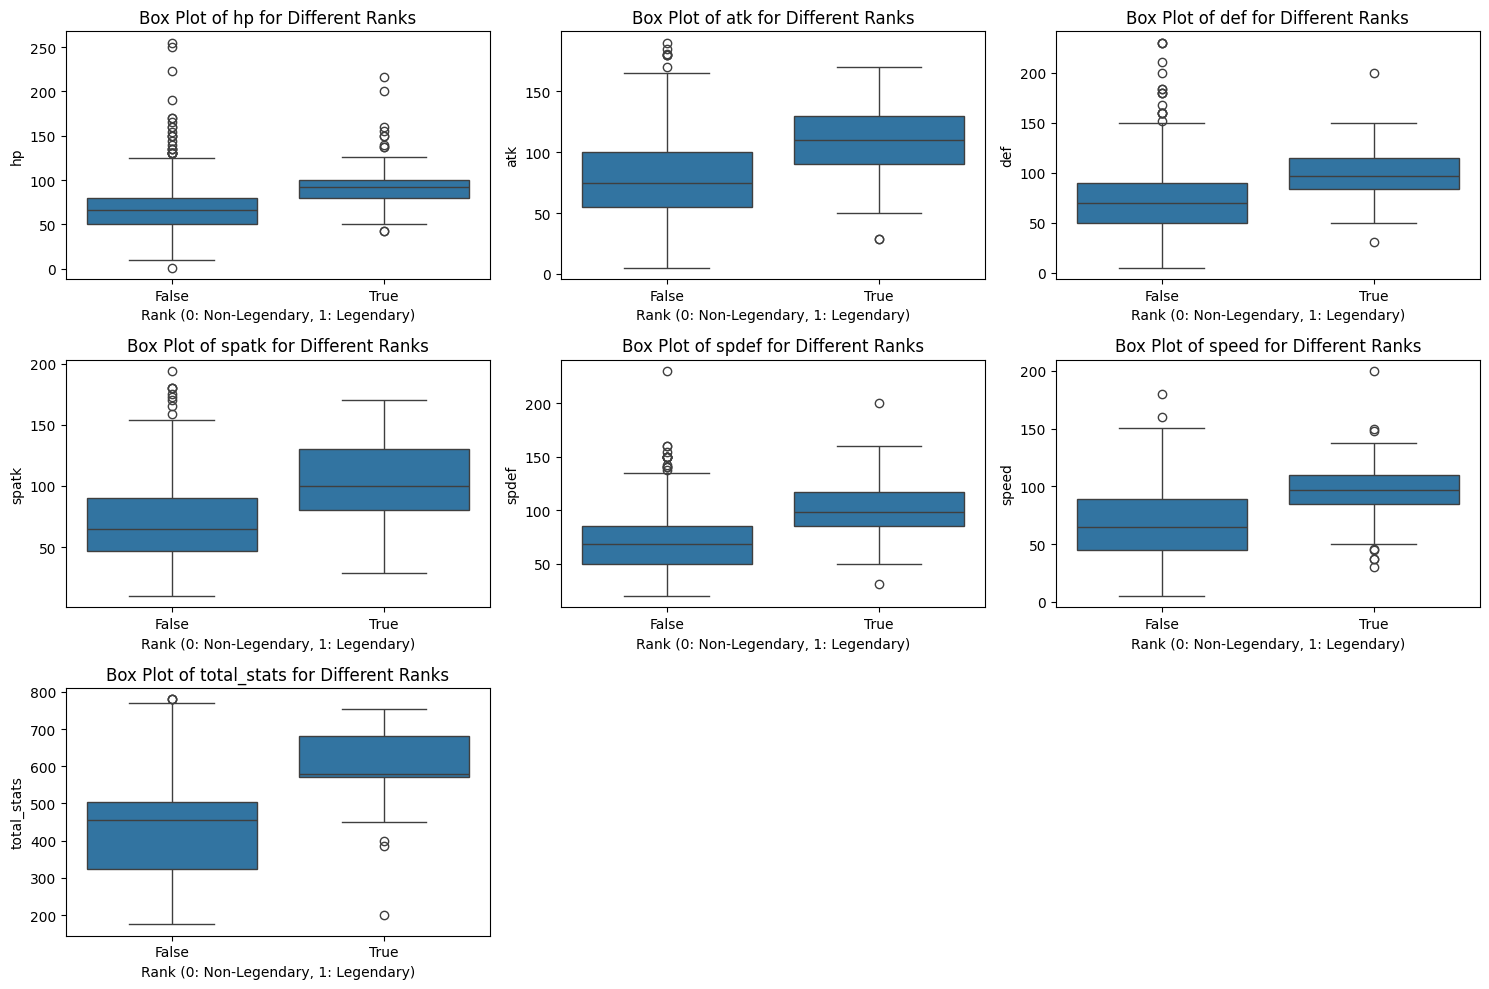

In [ ]:
# prompt: Box plots to compare distributions of stats for different ranks (legendary or mega-evolution vs. ordinary)

import matplotlib.pyplot as plt
import seaborn as sns

# We are using 'df_selected' created in the previous code

# Separate legendary and non-legendary Pokémon
legendary_pokemon = df_selected[df_selected['rank_legendary'] == 1]
non_legendary_pokemon = df_selected[df_selected['rank_legendary'] == 0]

# Create box plots for each stat
features_to_plot = ["hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)  # Adjust grid layout as needed
    sns.boxplot(x='rank_legendary', y=feature, data=df_selected)
    plt.title(f"Box Plot of {feature} for Different Ranks")
    plt.xlabel("Rank (0: Non-Legendary, 1: Legendary)")
    plt.ylabel(feature)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [ ]:
# Working with multiples columns as target

# Select relevant attributes and the target variable
multi_features = ["height", "weight", "hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]
multi_target = ['rank_legendary', 'rank_mega-evolution', "rank_baby"]

# Create a new DataFrame with selected features and target
# Use extend instead of + for combining the lists to avoid nesting
multi_features.extend(multi_target)  # This adds elements of target to the features list
# Include features in df_multi_selected
df_multi_selected = df[multi_features]

# Display the first few rows of the new DataFrame
df_multi_selected.head(10)

,height,weight,hp,atk,def,spatk,spdef,speed,total_stats,rank_legendary,rank_mega-evolution,rank_baby
0,7,69,45,49,49,65,65,45,318,False,False,False
1,10,130,60,62,63,80,80,60,405,False,False,False
2,24,1555,80,100,123,122,120,80,625,False,True,False
3,20,1000,80,82,83,100,100,80,525,False,False,False
4,24,1555,80,100,123,122,120,80,625,False,False,False
5,6,85,39,52,43,60,50,65,309,False,False,False
6,11,190,58,64,58,80,65,80,405,False,False,False
7,17,1005,78,104,78,159,115,100,634,False,True,False
8,17,905,78,84,78,109,85,100,534,False,False,False
9,17,100000,78,84,78,109,85,100,534,False,False,False


<ipython-input-115-6c6c51492d64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_selected['rank_combined'] = df_multi_selected['rank_legendary'] + df_multi_selected['rank_mega-evolution'] * 2 + df_multi_selected['rank_baby'] * 3
<ipython-input-115-6c6c51492d64>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_selected['rank_label'] = df_multi_selected['rank_combined'].map(rank_mapping)


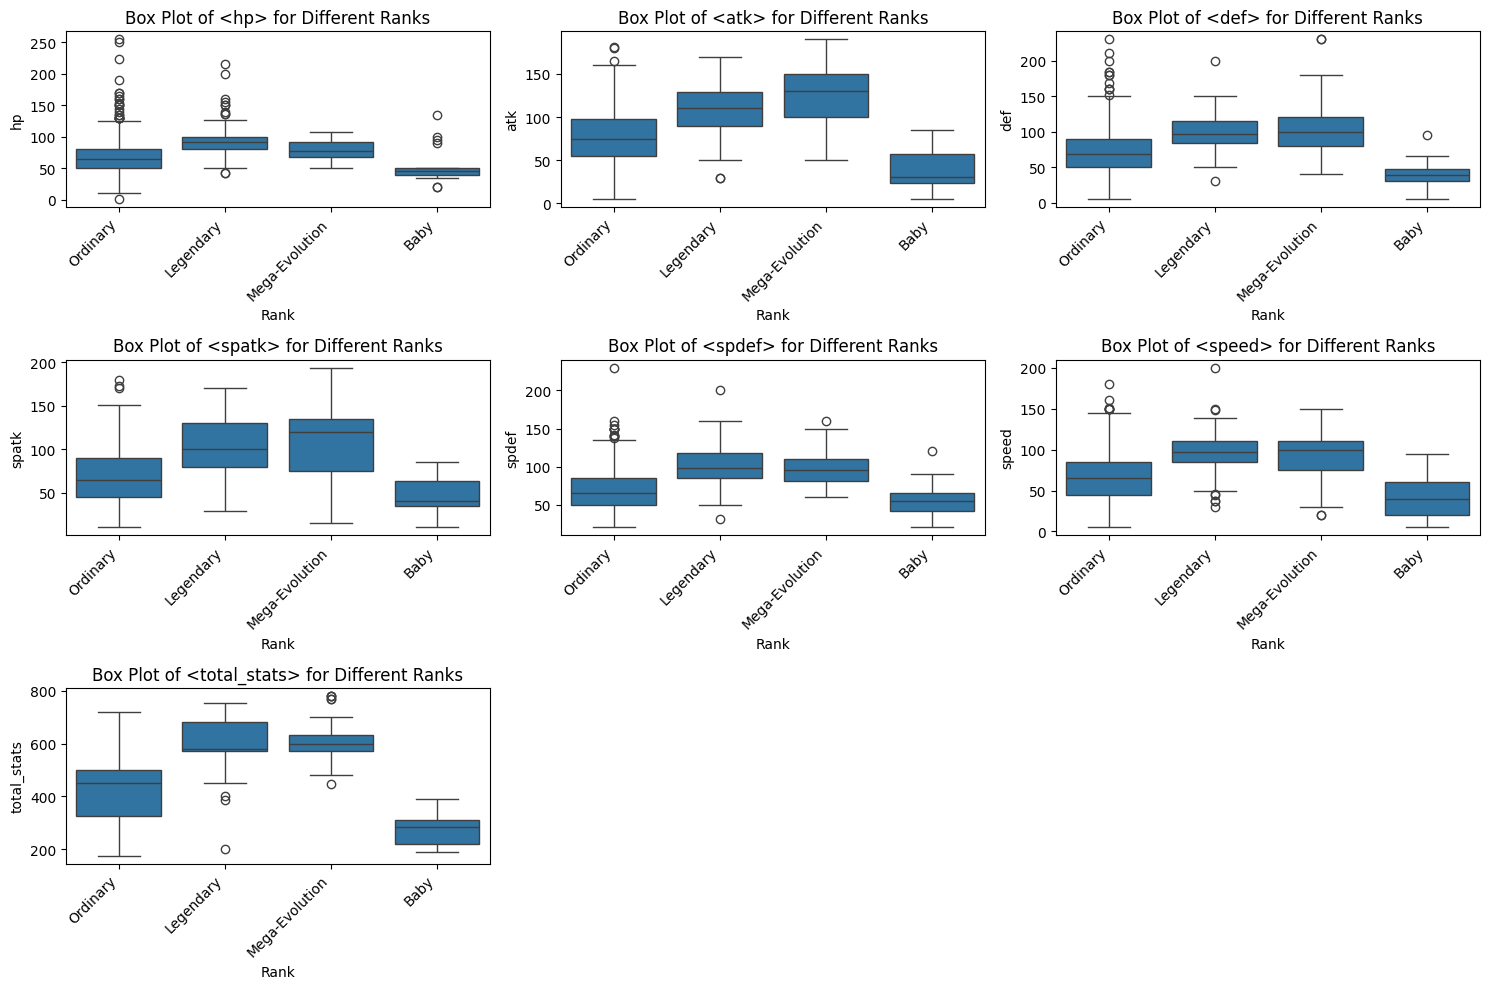

In [ ]:
# We are using 'df_multi_selected' DataFrame created previously

# Map combined rank values to labels
rank_mapping = {
    0: 'Ordinary',
    1: 'Legendary',
    2: 'Mega-Evolution',
    3: 'Baby'
}

# Create the 'rank_combined' column based on the values of the other rank columns
df_multi_selected['rank_combined'] = df_multi_selected['rank_legendary'] + df_multi_selected['rank_mega-evolution'] * 2 + df_multi_selected['rank_baby'] * 3

df_multi_selected['rank_label'] = df_multi_selected['rank_combined'].map(rank_mapping)

# Create box plots for each stat
features_to_plot = ["hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='rank_label', y=feature, data=df_multi_selected, order=list(rank_mapping.values()))
    plt.title(f"Box Plot of <{feature}> for Different Ranks")
    plt.xlabel("Rank")
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Types and Stats relationship.

<ipython-input-116-420c830d42a0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_types_selected['pokemon_type'] = df_multi_types_selected.apply(get_pokemon_type, axis=1)


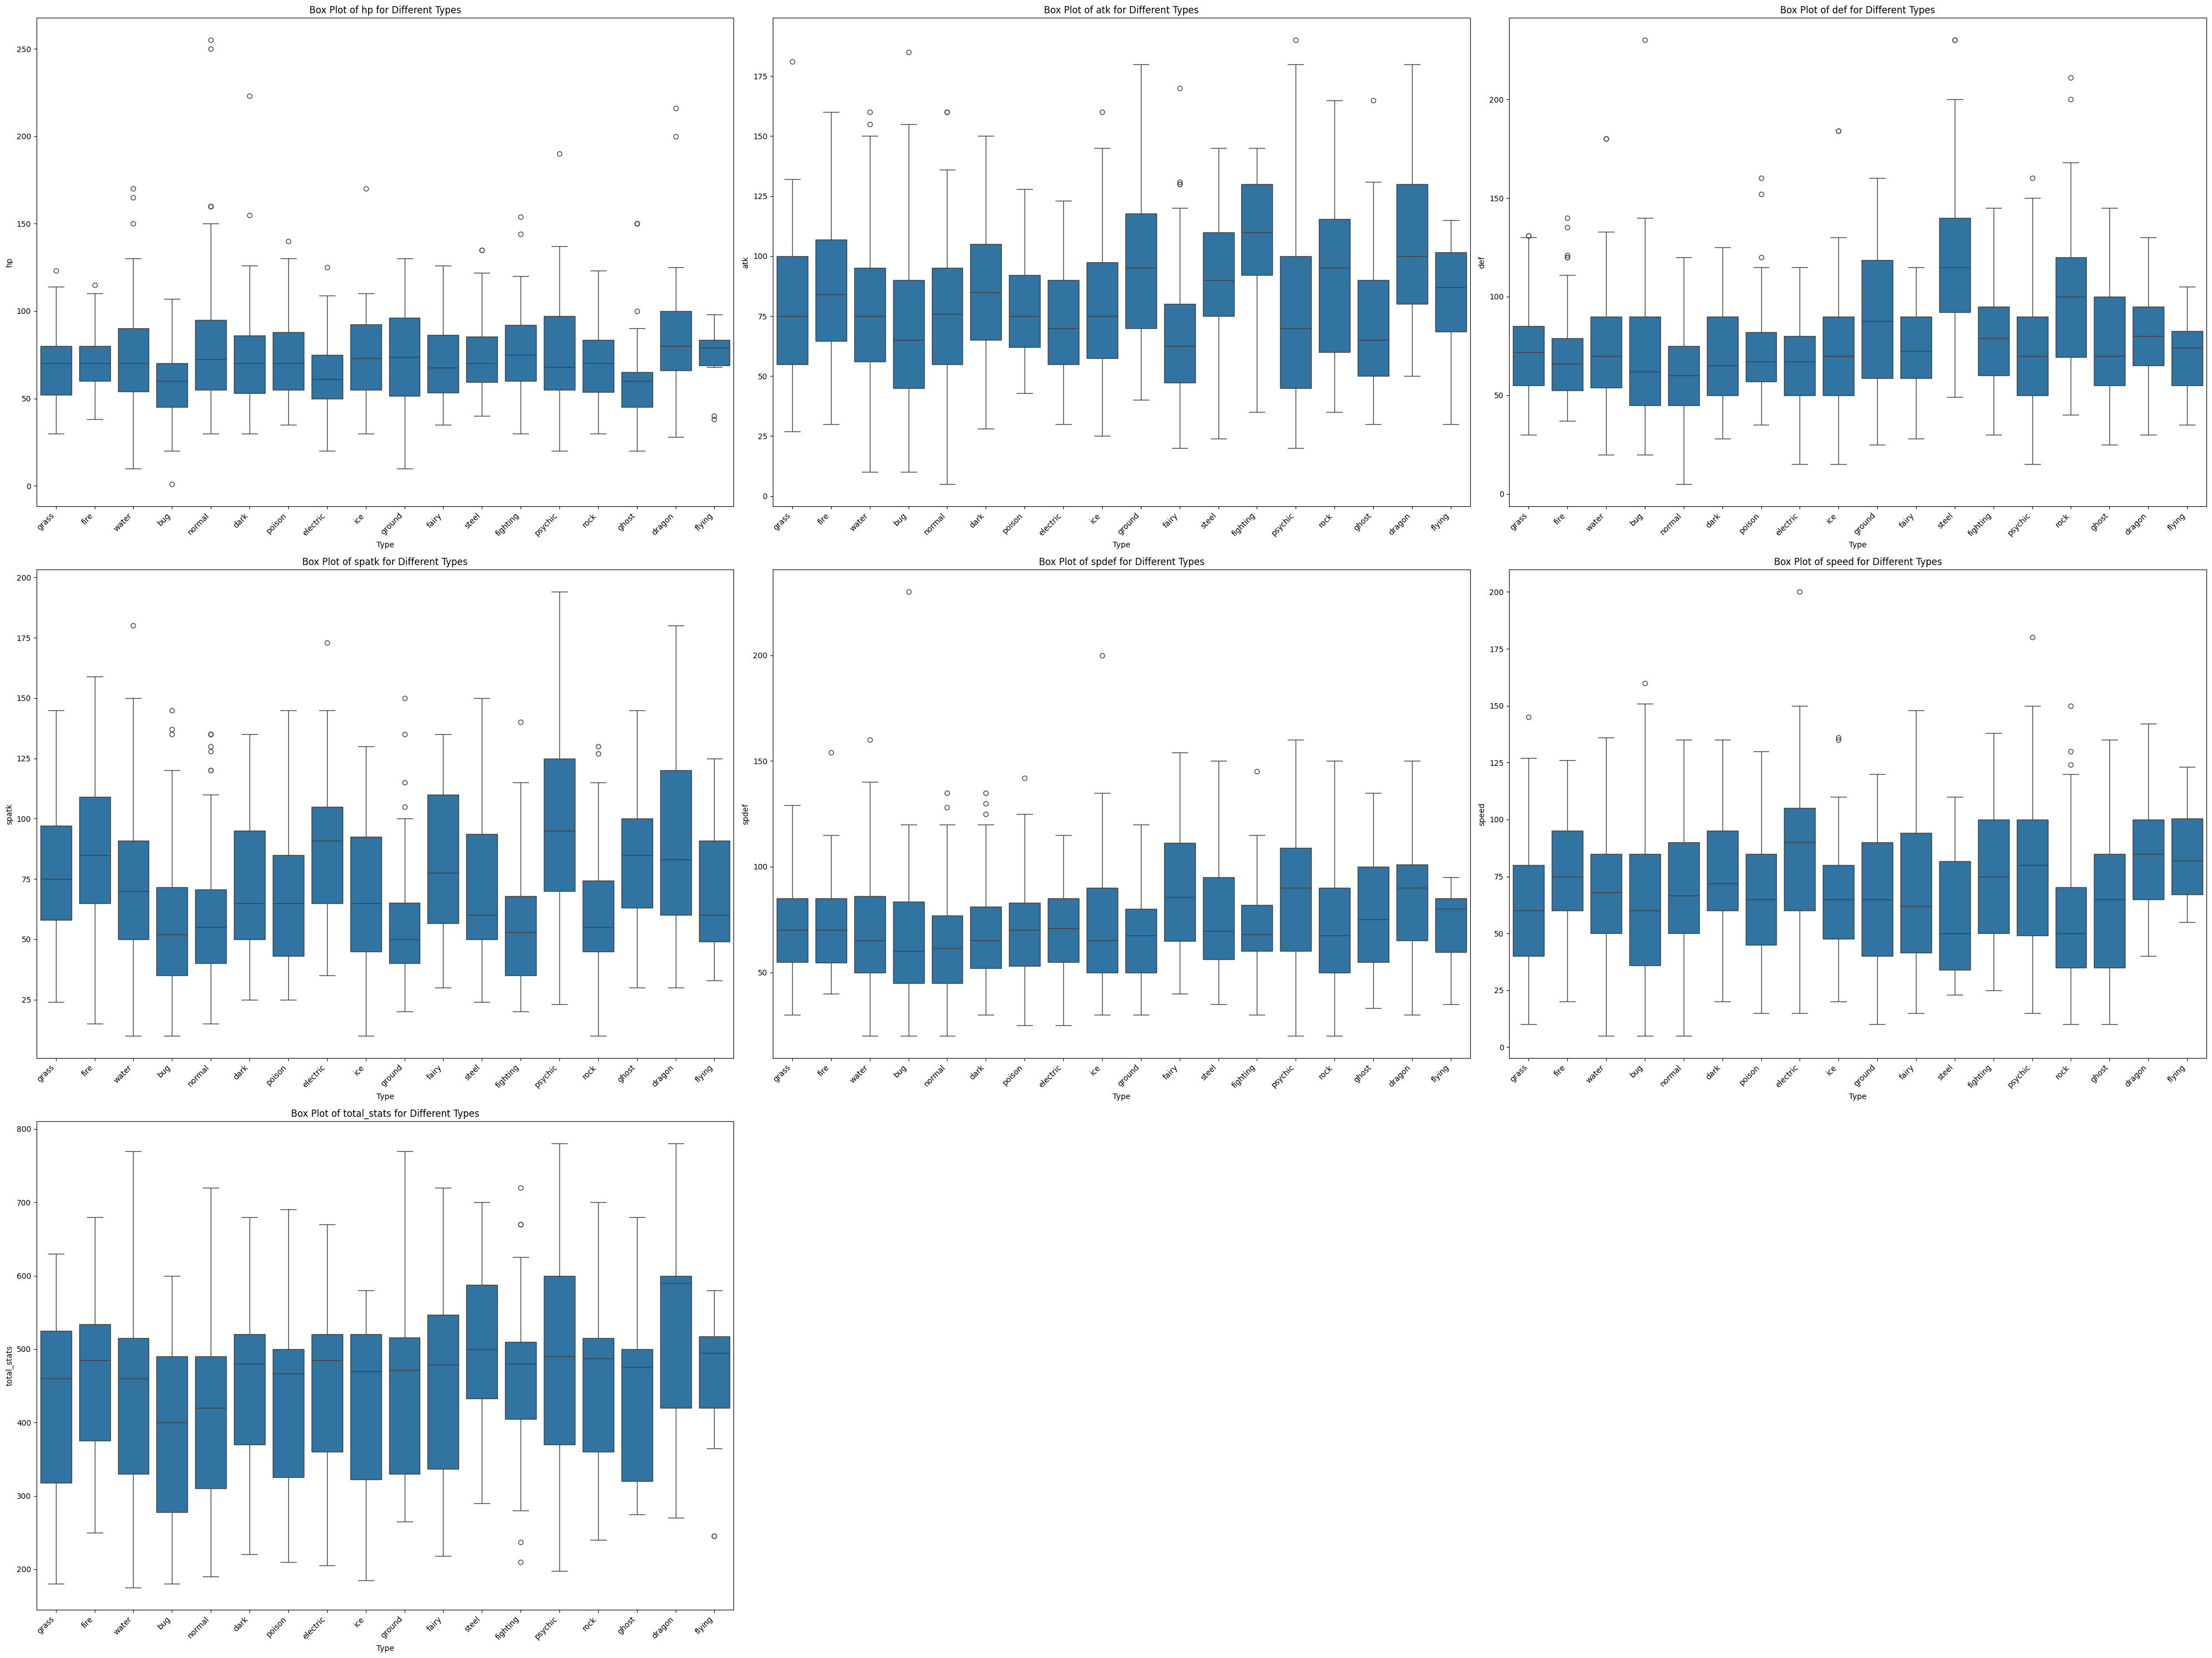

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant attributes and target variables (types)
multi_type_features = ["height", "weight", "hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]
type_columns = [col for col in df.columns if col.startswith('type1_') or col.startswith('type2_')]

# Create a new DataFrame with selected features and target
df_multi_types_selected = df[multi_type_features + type_columns]

# Function to get Pokemon type
def get_pokemon_type(row):
    for type_col in type_columns:
        if row[type_col] == 1:
            # Extract type name from column name (e.g., 'type1_fire' -> 'fire')
            return type_col.split('_')[1]
    return None  # Handle cases where no type is found

# Apply the function to create a 'pokemon_type' column
df_multi_types_selected['pokemon_type'] = df_multi_types_selected.apply(get_pokemon_type, axis=1)

# Create box plots for each stat
features_to_plot = ["hp", "atk", "def", "spatk", "spdef", "speed", "total_stats"]
plt.figure(figsize=(40, 30))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='pokemon_type', y=feature, data=df_multi_types_selected)
    plt.title(f"Box Plot of {feature} for Different Types")
    plt.xlabel("Type")
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Identifing imbalanced classes

Identifying imbalanced classes is a critical step in understanding whether your dataset has a skewed distribution of target labels.

Imbalanced classes occur when the distribution of target classes in a dataset is not uniform, meaning that some classes have significantly more samples than others. For example, in this Pokémon dataset, there might be far more Pokémon classified as "ordinary" than as "legendary" or "baby."

The code below check if the legendary rank is unbalaced. There are many ways we could do this, but we can start this way.

In [ ]:
# Count the occurrences of each class in the target variable
class_counts = df_selected['rank_legendary'].value_counts()

# Print the class counts
print(class_counts)

# Calculate the percentage of each class
class_percentages = (class_counts / len(df_selected)) * 100

# Print the class percentages
print(class_percentages)

# Determine if there's class imbalance based on a threshold (e.g., 80/20 split)
imbalance_threshold = 80  # Example threshold. Diferent project will use different thresholds

if any(percentage >= imbalance_threshold for percentage in class_percentages):
    print("Class imbalance detected.")
else:
    print("No significant class imbalance detected.")

rank_legendary
False    1122
True       99
Name: count, dtype: int64
rank_legendary
False    91.891892
True      8.108108
Name: count, dtype: float64
Class imbalance detected.


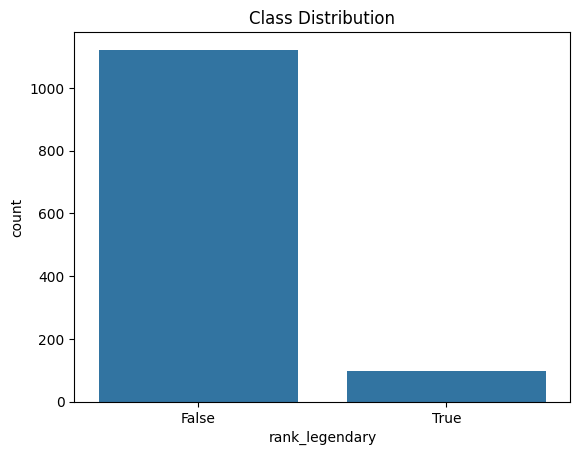

In [ ]:
# Visualizations make it easier to detect imbalances.

# Bar Plot Example:
y = df_selected['rank_legendary']
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

As we can see there are imbalanced classes.

### Attention to

**Severe Imbalance:** If one class constitutes over 75%-80% of the data, it indicates a severe imbalance.

**Moderate Imbalance:** If the largest class has 60%-75% representation, the imbalance is moderate.

**Balanced Data:** Ideally, all classes should have roughly equal representation (close to 33% for three classes).

#### Implications of Imbalanced Classes

Training Challenges: Models tend to predict the majority class more often because it minimizes errors. Minority classes may be ignored.

Evaluation Issues: Accuracy becomes unreliable as a performance metric. Precision, recall, and F1-score become more relevant.

#### Apply Resampling Techniques:

- Oversample the minority classes.

- Undersample the majority classes.

- Use synthetic data generation techniques (e.g., SMOTE).

**Use Class-Weighted Models:**

Adjust the algorithm to account for class imbalances (e.g., using class_weight='balanced').

**Choose Better Metrics:**

Use metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) instead of plain accuracy.

We will use SMOTE technique in a few moments.

## 4. Split the Dataset

### What we are doing

We are dividing your dataset into two subsets:

**Training Set:** Used to train your machine learning model. The model learns patterns from this subset.

**Testing Set:** Used to evaluate how well the model generalizes to unseen data.

This split ensures that the model is not tested on the same data it was trained on, which helps avoid overfitting (when the model performs well on the training data but poorly on new data).

### What to expect

After this step, we will have four subsets:

* **x_train**: Features for training (80% of the data by default).

* **y_train**: Target values for training.

* **x_test**: Features for testing (20% of the data).

* **y_test**: Target values for testing.

In [ ]:

from sklearn.model_selection import train_test_split

# Assuming 'df_selected' is your DataFrame with features and the target variable 'rank_legendary'
# Or use 'df_multi_selected' if you are working with multiple target variables
x = df_selected.drop('rank_legendary', axis=1)  # Features
y = df_selected['rank_legendary']  # Target variable

# randomize rows in the dataset to prevent bias
df_selected = df_selected.sample(frac=1, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Print the shapes of the resulting sets to verify the split
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (976, 9)
x_test shape: (245, 9)
y_train shape: (976,)
y_test shape: (245,)


## Preventing BIAS using SMOTE

The code above is completely fine as it is, but there are some situations where we could try to do things diferentely. As we saw above there are imbalanced classes in this dataset.

So we are going to use a slight differente code to train our data.



In [ ]:
## imbalanced-learn

from imblearn.over_sampling import SMOTE # pip install imbalanced-learn
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a DataFrame 'df' with features and target
x = df_selected.drop('rank_legendary', axis=1)  # Features
y = df_selected['rank_legendary']  # Target variable

# Train-test split (stratify ensures class balance in test set)
x_train, x_test, y_train_smote, y_test_smote = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

## Apply SMOTE to the Training Data
## SMOTE generates synthetic examples for the minority classes in the training set.

smote = SMOTE(random_state=42)

# Fit and resample the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Print the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({False: 897, True: 79})
After SMOTE: Counter({False: 897, True: 897})


## 5. Choose a Model

### What You’re Doing
You’re selecting a machine learning algorithm to build your classifier. This step involves:

* Picking a model that suits your problem.

* Training the model on the training set (x_train, y_train).

* Using the trained model to make predictions.

Several classification algorithms can be used, such as:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting (e.g., XGBoost, LightGBM)
- Support Vector Machines (SVM)

### Why It’s Important

Different algorithms (e.g., Logistic Regression, Random Forest, etc.) have different strengths and weaknesses. For example:

**Random Forest** is good for handling non-linear data and doesn’t require much parameter tuning.

**Logistic Regression** is simpler and faster but may not capture complex relationships.

We will start with a simple model (e.g., Logistic Regression) to create a baseline.

### What to Expect
After training, the model will have learned patterns in the training data. You can now use it to make predictions on the testing data.

Accuracy: 0.9183673469387755
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       225
        True       0.00      0.00      0.00        20

    accuracy                           0.92       245
   macro avg       0.46      0.50      0.48       245
weighted avg       0.84      0.92      0.88       245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


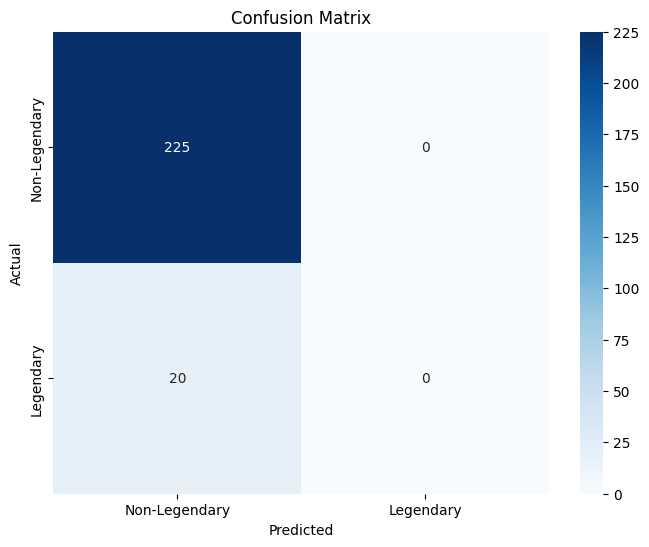

In [ ]:
## Below we are using the data WITHOUT SMOTE technique

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Legendary', 'Legendary'],
            yticklabels=['Non-Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy: 0.9183673469387755
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       225
        True       0.00      0.00      0.00        20

    accuracy                           0.92       245
   macro avg       0.46      0.50      0.48       245
weighted avg       0.84      0.92      0.88       245



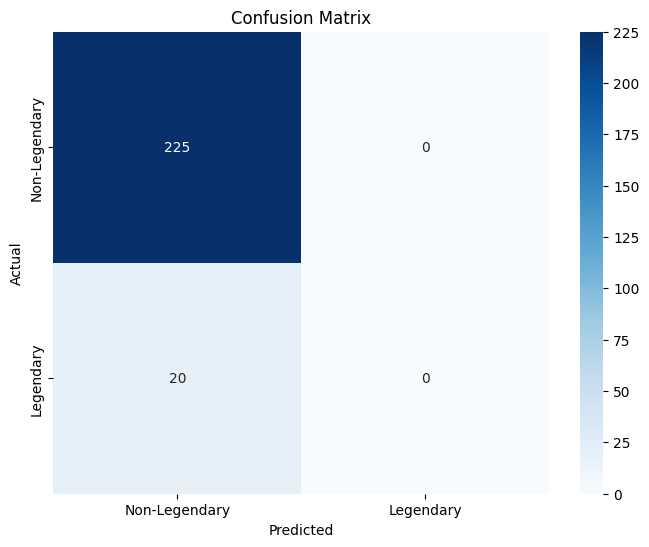

In [ ]:
## Below we are using the data USING SMOTE technique

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
# Changed from: y_pred = model.predict(x_train_resampled)
y_pred = model.predict(x_test) # Predict on the original test set (x_test)

# Evaluate the model
accuracy = accuracy_score(y_test_smote, y_pred) # y_test_smote is the correct target for the test set
print(f"Accuracy: {accuracy}")

print(classification_report(y_test_smote, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test_smote, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Legendary', 'Legendary'],
            yticklabels=['Non-Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Train the Model

### What You’re Doing

You’re using the training data (X_train and y_train) to "teach" your machine learning model to recognize patterns and relationships in the data. During this process, the model learns to associate input features (e.g., stats, types) with the target labels (e.g., classification as legendary, baby, ordinary).

**This step includes:**

Initializing the model.
Fitting the model to the training data.
Why It’s Important
This is the core learning process where the algorithm develops its understanding of the data. How well this is done determines how accurately the model will make predictions.

**Going deep**: A good model captures patterns in the data without overfitting.
An overfit model memorizes the training data and performs poorly on unseen data.
An underfit model fails to capture enough patterns and performs poorly on both training and testing data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Example using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
## Using SMOTE

from sklearn.ensemble import RandomForestClassifier

# Example using Random Forest
modelSmote = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2, n_estimators=100)  # Adjust values as needed
modelSmote.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

### What to Expect

After calling _model.fit()_, the model is now trained.

It has learned patterns from the training data.
You can use the trained model to make predictions on new or unseen data.

**Optional**: Evaluate Training Performance
If you want to see how well the model learned the training data, you can check its performance on x_train as a quick validation step. This is useful for detecting overfitting.



In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


In [ ]:
## Using SMOTE data

# Make predictions on the training set
y_train_pred = modelSmote.predict(x_train_resampled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred) # Use y_train_resampled instead of y_train_smote
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.94


After Training
Once the model is trained, you can proceed to:

* Predict the classifications for the testing set (x_test or x_test_resampled) using model.predict().

* Evaluate the predictions (as described in Step 7).

### How to Make Predictions

You can use the .predict() method of your trained model to predict the classifications of new data.

1. Predictions on the Test Set
This allows you to evaluate the model's performance by comparing its predictions (y_pred) to the actual labels (y_test).



### What to Expect

y_pred will be an array of predicted labels corresponding to the rows in X_test. For example:

In [ ]:
## Expected output
# Predictions: ['ordinary', 'ordinary', 'legendary', 'baby', 'ordinary', 'ordinary', ...]


In [ ]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(x_test)

# Print some sample predictions
print("Predictions:", y_pred[:10])  # First 10 predictions


Predictions: [False False False False False False False False False False]


In [ ]:
# Use the trained model to make predictions on the test set
y_pred = modelSmote.predict(x_test)

# Print some sample predictions
print("Predictions:", y_pred[:10])  # First 10 predictions


Predictions: [False False False False False False False False False False]


### 2. Predictions on New Data

You can also predict classifications for Pokémon that weren’t part of the training or testing sets.

In [ ]:
# Example of new Pokémon data (height, weight, hp, atk, def, spatk, spdef, speed, total_stats)

new_pokemon = [[1.0, 10.5, 45, 49, 49, 65, 65, 45, sum([45, 49, 49, 65, 65, 45])],  # Bulbasaur-like stats
               [2.0, 95.0, 100, 120, 90, 150, 140, 95, sum([100, 120, 90, 150, 140, 95])]]  # Legendary-like stats

# Make predictions for new data
new_predictions = model.predict(new_pokemon)
print("New Predictions:", new_predictions)

New Predictions: [False False]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Example of new Pokémon data (height, weight, hp, atk, def, spatk, spdef, speed, total_stats)

new_pokemon = [[1.0, 10.5, 45, 49, 49, 65, 65, 45, sum([45, 49, 49, 65, 65, 45])],  # Bulbasaur-like stats
               [2.0, 95.0, 100, 120, 90, 150, 140, 95, sum([100, 120, 90, 150, 140, 95])]]  # Legendary-like stats

# Make predictions for new data
new_predictions = modelSmote.predict(new_pokemon)
print("New Predictions:", new_predictions)

New Predictions: [False False]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Expected Output

For the above new_pokemon input, you might get predictions like:

In [ ]:
## New Predictions: ['ordinary', 'legendary']


## 7. Evaluating the Model

Check the model's performance using metrics like:

- Accuracy
- Precision, Recall, F1-Score (especially for imbalanced classes)
- Confusion Matrix
- ROC-AUC Score (if applicable)

#### What we are doing?

You’re checking how well the model performs by comparing its predictions on the testing set (x_test) to the actual labels (y_test). Evaluation metrics tell you:

#### **How accurate is the model?**

Does the model perform equally well for all classes?

Are there any areas for improvement?

#### **Common Metrics**

**Accuracy:** Percentage of correct predictions.

**Precision and Recall:** Useful when dealing with imbalanced datasets.

**Precision:** How many predicted classifications were correct?

**Recall:** How many actual classifications were correctly identified?

**F1-Score:** Combines precision and recall into one metric.

**Confusion Matrix:** Shows how many predictions were correct and incorrect for each class.

### What to Expect

* **Classification Report:** Includes precision, recall, and F1-score for each class. Example:


* **Confusion Matrix:** A grid showing how many predictions were correct (diagonal) versus incorrect (off-diagonal). Example:



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       225
        True       0.00      0.00      0.00        20

    accuracy                           0.92       245
   macro avg       0.46      0.50      0.48       245
weighted avg       0.84      0.92      0.88       245

Confusion Matrix:
[[225   0]
 [ 20   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## How to Interpret

High precision and recall scores for each class mean the model is performing well.

Look for errors in the confusion matrix to see where the model struggles (e.g., confusing "baby" with "ordinary").

Use these insights to improve the model (e.g., feature engineering, trying a different algorithm, or adjusting hyperparameters).